<a href="https://colab.research.google.com/github/dcafarelli/CMT-ABAW2020-EXPR/blob/main/data_labeling/expW_labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import glob
import pandas as pd
from PIL import Image
from tqdm import tqdm

In [ ]:
classes = ('Neutral', 'Anger', 'Disgust', 'Fear', 'Happin.', 'Sadness', 'Surprise')
plot_Expr_list = [6, 0, 1, 2, 3, 4, 5]
ExpW_to_aff_wild2 = [1, 2, 3, 4, 5, 6, 0]

In [ ]:
path_origin = '/EXPW DataSet/origin' 

In [ ]:
lst_file_path = '/expW/label.lst'

In [ ]:
cropped_path = '/EXPW DataSet/cropped_expW'

In [ ]:
def read_lst(lst_file):
    with open(lst_file, 'r') as f:
        lines = f.readlines()
    lines = [l.strip() for l in lines]
    data = {'name': [] , 'face_id': [] , 'ymin':[] , 'xmin':[], 'xmax': [] , 'ymax':[], 'confidence':[], 'emotion':[]}
    for l in lines:
        l = l.split(" ")
        data['name'].append(l[0])
        data['face_id'].append(int(l[1]))
        data['ymin'].append(int(l[2]))
        data['xmin'].append(int(l[3]))
        data['xmax'].append(int(l[4]))
        data['ymax'].append(int(l[5]))
        data['confidence'].append(float(l[6]))
        data['emotion'].append(int(l[7]))
    df = pd.DataFrame.from_dict(data)
    return df

In [ ]:
expW_df = read_lst(lst_file_path)

In [ ]:
expW_df

In [ ]:
paths = []
labels = []
data_file = {}

for i in tqdm(range(len(expW_df)), total = len(expW_df)):
    line = expW_df.iloc[i]
    path = os.path.join(path_origin, line['name'])
    df_path = os.path.join('/cropped_expW', line['name'])
    if os.path.exists(path):
        bbox = line[['xmin', 'ymin', 'xmax', 'ymax']].values
        img = Image.open(path).convert("RGB")
        face = img.crop(tuple(bbox))
        save_path = os.path.join(cropped_path, line['name'])
        face.save(save_path)
        
    paths.append(df_path)
    labels.append(line['emotion'])

data_file['path'] = paths
data_file['label'] = np.array(labels)

df = pd.DataFrame.from_dict(data_file)   

100%|██████████| 91793/91793 [00:15<00:00, 6035.31it/s]


In [ ]:
df['label'] = np.array([ExpW_to_aff_wild2[x] for x in df['label']])

In [ ]:
print('Distribution of classes:')
fig, ax = plt.subplots()
_, counts = np.unique(df['label'], return_counts=True)
ax.bar(classes, counts)
ax.set_xticks(classes)
plt.show()

In [ ]:
aff_wild_2 = pd.read_pickle('/annotations/train_set.pkl') #path to train set dataframe

In [ ]:
aff_wid_expW_train_set = aff_wild_2.append(df) #merging the two labeled datasets

In [ ]:
print('Distribution of merged dataset classes:')
fig, ax = plt.subplots()
_, counts = np.unique(aff_wid_expW_train_set['label'], return_counts=True)
ax.bar(classes, counts)
ax.set_xticks(classes)
plt.show()

In [ ]:
aff_wid_expW_train_set

In [ ]:
save_path = os.path.join('/annotations', 'aff_wild_expW_train_set.pkl')
print(save_path)
aff_wid_expW_train_set.to_pickle(save_path)

/content/gdrive/My Drive/TESI/FER/AffWild2/annotations/aff_wild_expW_train_set.pkl


In [ ]:
merged_ds = pd.read_pickle('/annotations/aff_wild_expW_train_set.pkl')

In [ ]:
merged_ds['label'].value_counts()

Distribution of classes:


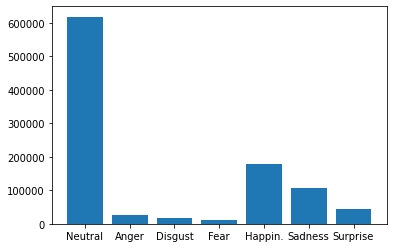

In [ ]:
print('Distribution of classes:')
fig, ax = plt.subplots()
_, counts = np.unique(merged_ds['label'], return_counts=True)
ax.bar(classes, counts)
ax.set_xticks(classes)
plt.show()